<a href="https://colab.research.google.com/github/tomfox1/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [309]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(1)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
4520,74,22000.0,3,73,3.5,3,1,2010,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
features = df.columns.tolist()

features = ['make',
 'body',
 'mileage',
 'engV',
 'engType',
 'registration',
 'year',
 'drive']

target = ["price"]

X = df[features]
y = df[target]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6796, 8), (1699, 8), (6796, 1), (1699, 1))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [313]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [314]:
model.intercept_, model.coef_, 

(array([-2269355.07723142]),
 array([[  -35.16726588, -1770.98509064,   -40.26859658,   273.03540784,
         -1111.08031708,  4535.06013378,  1140.73124767,  8292.04613874]]))

## 1.5 Use the test data to make predictions.

In [293]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(data=y_pred, columns=["y_pred"])
y_pred.head()

,y_pred
0,19200.266393
1,5355.002844
2,26205.124150
3,12478.550584
4,24539.049938


## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [300]:
print("RMSE:", (mean_squared_error(y_test, y_pred)**(1/2)))
print("r2_score:", r2_score(y_test, y_pred))

RMSE: 21394.43524600266
r2_score: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

As year (of production) increases by 1 unit, sale price on average increased by 1145USD



## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

RMSE is the square root of the error we get represented by the average difference of the vertical distance from our true y values and our predicted y value, calculated by our linear regression model

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

R-squared score represents the goodness of fit, or how much variance in our regressors is explained by our dependent variable



# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [295]:
#creating df2 to represent our df with "log_price" and dropping "price"
df["log_price"] = np.log(df["price"])
df2 = df.drop(columns=["price"])
df2.head()

,make,body,mileage,engV,engType,registration,year,drive,log_price
0,23,0,68,2.5,1,1,2010,1,9.648595
1,50,3,173,1.8,1,1,2011,2,9.928180
2,50,2,135,5.5,3,1,2008,2,10.463103
3,50,5,162,1.8,0,1,2012,0,9.786954
4,55,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

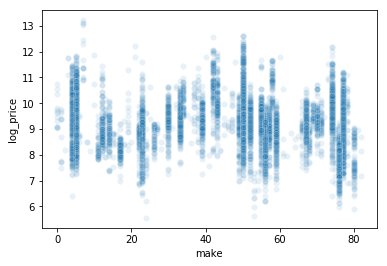

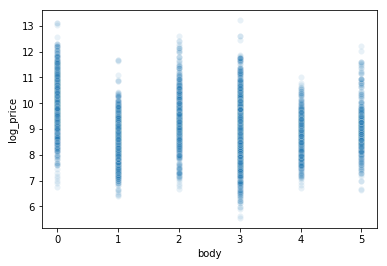

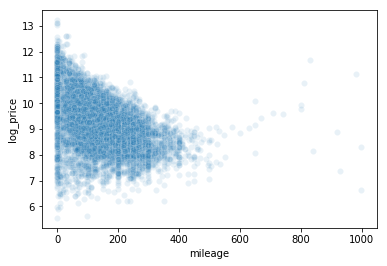

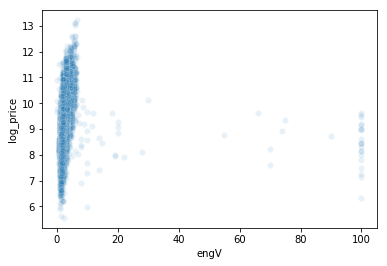

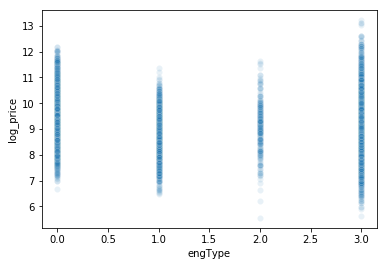

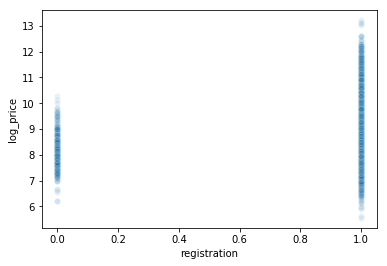

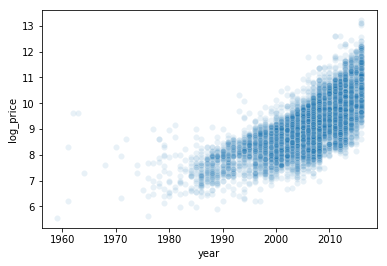

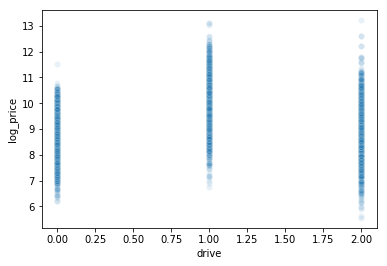

In [296]:
features = ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']
target = "log_price"

for feature in features:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [301]:
#"mileage", "year" and "make" appear to exhibit appropriate log-linear behaviors 

df2["year_squared"] = df2["year"]**2
df2["make_squared"] = df2["make"]**2
df2["mileage_squared"] = df2["mileage"]**2
df2.head(1)

,make,body,mileage,engV,engType,registration,year,drive,log_price,year_squared,make_squared,mileage_squared
0,23,0,68,2.5,1,1,2010,1,9.648595,4040100,529,4624


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [302]:
#our R-squared score has greatly improved by fitting our data with the log-linear model
#our MRSE has also decreased
X1 = df2.drop(columns = ["log_price"])
y1 = df2[["log_price"]]


model_log = LinearRegression()
model_log.fit(X1, y1)
y_pred1 = np.exp(model_log.predict(X1))

print("intercept:\n ", model_log.intercept_)
print("coefficients: \n ", model_log.coef_)
print("R-squared score:\n ", model_log.score(X1, y1))
print("MRSE:\n ", (mean_squared_error(y1, y_pred1))**(1/2))

intercept:
  [6525.98646023]
coefficients: 
  [[-1.15719890e-03 -9.56554427e-02  7.97394520e-04  8.53772406e-03
  -4.70313727e-02  6.54431804e-01 -6.61418065e+00  3.75717746e-01
   1.67754918e-03 -6.87849701e-06 -2.39381228e-07]]
R-squared score:
  0.6738623938889929
MRSE:
  16261.5210152505


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Our coefficients are interpreted differently, instead of a raw value interpetation we have a percentage-base interpretation. 

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [303]:
#using original features provided by df 
model_tree = DecisionTreeRegressor(max_depth=5)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [304]:
model_tree.score(X_test, y_test)

0.7759205818015867

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [305]:
#log-polynomial linear regression 
#interesting to note that our p-values are high p>0.05 for "make", "make_squared" and "mileage_squared"
#meaning we don't reject our null hypothesis that coefficients = 0, meaning those regressors are useless
#Jarquera-Bera score is high indicating our errors are not normally distributed 
#our robust std errors are very low, which is a greata  sign 
model = sm.OLS(y1, sm.add_constant(X1))
results = model.fit(cov_type="HC3")

print(results.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1558.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:56:29   Log-Likelihood:                -6963.7
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8483   BIC:                         1.404e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6525.9865    686.385     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [306]:
#we have multicolinearity problems since VIF>5 for our regressors "mileage", "year", "year_squared" and "mileage_squared"
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           123262.013632
make                 1.059149
body                 1.158326
mileage              1.549610
engV                 1.009321
engType              1.141183
registration         1.091892
year                 1.458528
drive                1.131021
dtype: float64

In [0]:
#let's remove said variables from our model and see if we can decrease multi-colinearity in our model 

f = ['make', 'body', 'engV', 'engType', 'registration', 'drive', 'make_squared']

XX = df2[f]

In [308]:
#J-B score decreased however our R-squared score is very low, it doesn't seem as if it compensates
m = sm.OLS(y1, sm.add_constant(XX))
results1 = m.fit(cov_type="HC3")

print(results1.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     524.6
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:56:44   Log-Likelihood:                -10574.
No. Observations:                8495   AIC:                         2.116e+04
Df Residuals:                    8487   BIC:                         2.122e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.5423      0.045    189.002   